# Non-linear classification on multi-feature dataset

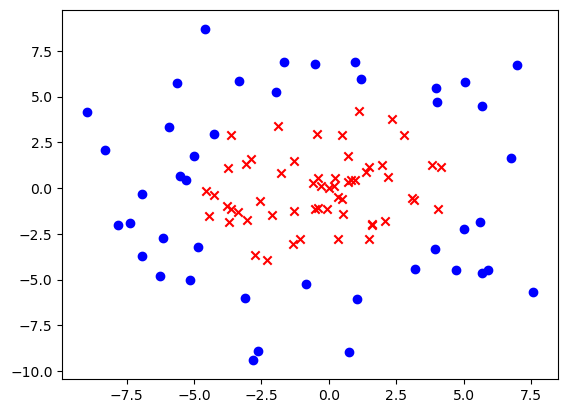

In [95]:
import numpy as np 
import matplotlib.pyplot as plt 

""" Making dataset """
N = 100
R1 = 5
R2 = 10

# generate random radius and angle
np.random.seed(69)
r = np.random.uniform(0, R2, N)
theta = np.random.uniform(0, 2*np.pi, N)

# calculate x and y coordinates
X1 = r * np.cos(theta)
X2 = r * np.sin(theta)

Y = np.where(r < R1, 0, 1)

# plot
for i in range(N):
    if Y[i] == 0:
        plt.scatter(X1[i], X2[i], c='r', marker='x')
    else:
        plt.scatter(X1[i], X2[i], c='b', marker='o')

plt.show()


In [96]:
"""Rescaling"""
# X1
X1_mean = np.mean(X1)
X1_range = np.ptp(X1)

X1 -= X1_mean
X1 /= X1_range

# X2
X2_mean = np.mean(X2)
X2_range = np.ptp(X2)

X2 -= X2_mean
X2 /= X2_range

# Y
# Y_mean = np.mean(Y)
# Y_range = np.ptp(Y)

# Y -= Y_mean
# Y /= Y_range

In [97]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [98]:
w = np.random.uniform(low=-5, high=5, size=2)
b = np.random.uniform(low=-1, high=1)

X = np.concatenate((X1.reshape(1, N), X2.reshape(1, N)), axis=0)

def update(lr):
    global w, b

    Y_pred = sigmoid( np.dot(w, X**2) + b )

    dw = -np.dot( X**2, (Y - Y_pred) ) / N
    db = -np.sum( (Y - Y_pred) ) / N

    w -= lr * dw
    b -= lr * db

    J = np.sum( (Y - Y_pred)**2 ) / (2*N)

    return J

In [99]:
lr = 0.05

J = [update(lr) for _ in range(2)]

while True:
    J.append(update(lr))

    if len(J) % 10 == 0:
        lr *= 0.1

    if abs(J[-2] - J[-1]) < 10**(-5):
        print(f"Final cost = {J[-1]}. It took {len(J)} steps.")
        break

Final cost = 0.12843514976064524. It took 12 steps.


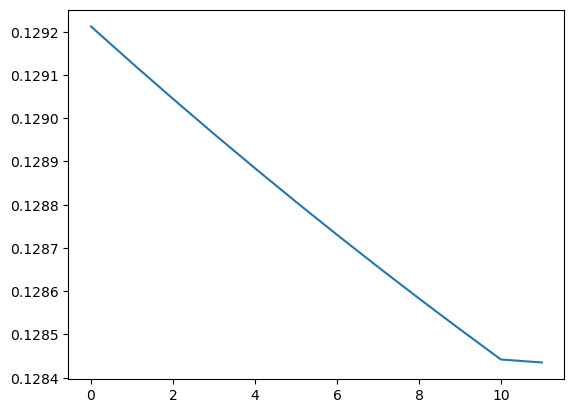

In [100]:
x = np.arange(len(J))

plt.plot(x, J)
plt.show()

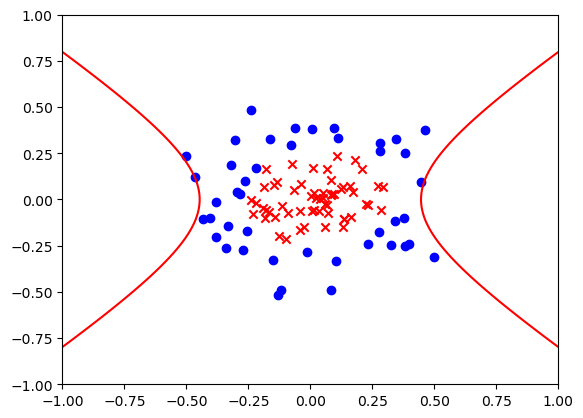

In [101]:
for i in range(N):
    if Y[i] == 0:
        plt.scatter(X1[i], X2[i], c='r', marker='x')
    else:
        plt.scatter(X1[i], X2[i], c='b', marker='o')

# draw the curve: w1*x1^2 + w2*x2^2 + b = 0
# create a grid of x1 and x2 values
x1_vals = np.linspace(-1, 1, 100)
x2_vals = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_vals, x2_vals)

# evaluate the equation for each x1 and x2 pair
y = w[0]*x1**2 + w[1]*x2**2 + b

# plot the ellipse
plt.contour(x1, x2, y, levels=[0], colors='red')
# plt.savefig("dec_lr.png", dpi=300)
plt.show()

In [102]:
print(w, b)

[ 3.21905611 -4.04202295] -0.6413143428304173
